<a href="https://colab.research.google.com/github/FahimShahriarAnik/NLP/blob/main/Implementing_gradient_descent_for_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this lab, we are going to implement the gradient descent algorithm for linear regression (y = w1 * x1 + w2 * x2). For this purpose, we will create some synthetic data where we know the true parameter. In our training, we will fit our linear model by starting from a random point and increasingly updating the parameters of the model. You have a few todos here (see the comments starting with the phrase todo and ... in code). As before, after finishing this submit a pdf.

In [ ]:
# imports
import numpy as np
import matplotlib.pylab as plt
from colour import Color
%matplotlib inline

In [ ]:
# generating synthetic input, output and true parameters
# we will work with a small sample
sample_size = 100
# setting the seed to make it reproducible
np.random.seed(11)
# input by random sample
xs = np.random.random((sample_size, 2))*2-0.5
# true parameters
ws_true = np.array([[0.7, -0.3]])
# true output, y = w1*x1 + w2*x2
ys_true = np.dot(xs, ws_true.T)
# we won't add random noise to our data in this lab, but you can try using this
# ys_true = ys_true + (np.random.random((100,1))-0.5)/1000
# print a sample
xs[:5,], ys_true[:5,]

(array([[-0.13946062, -0.46104952],
        [ 0.42643705,  0.94986786],
        [ 0.34040721,  0.4708542 ],
        [-0.47443837,  0.47474321],
        [ 1.3836133 ,  1.20159018]]),
 array([[ 0.04069242],
        [ 0.01354558],
        [ 0.09702879],
        [-0.47452982],
        [ 0.60805226]]))

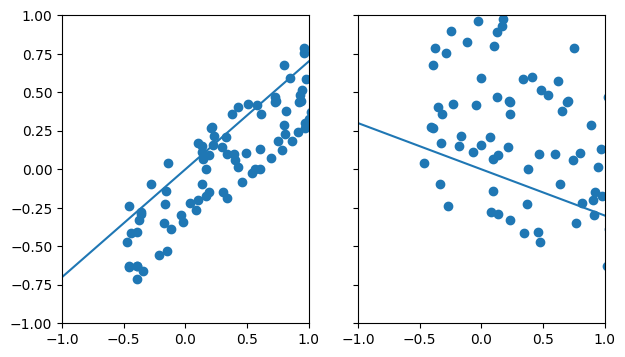

In [ ]:
# lets plot the xs and ys
f, ax = plt.subplots(1, 2, figsize=(7, 4), sharex=True, sharey=True)
# plot with respect to x1
ax[0].scatter(xs[:,0], ys_true)
ax[0].axline((0, 0), (1, ws_true[0][0]))
# plot with respect to x2
ax[1].scatter(xs[:,1], ys_true)
ax[1].axline((0, 0), (1, ws_true[0][1]))
ax[0].set_xlim(-1,1)
_=ax[0].set_ylim(-1,1)

In [ ]:
# gradient descent algorithm
# in practice, we will start with a random estimation of the weight
# for the sake of this lab, we will start here
ws_estimate = np.array([[-0.3, 0.2]])
# we are setting our hyperparamter for the gradient descent to this 0.2
learning_rate = 0.1
# max iteration we are going to try to optimize for
max_iter = 30
# we will store params and error
error = []
theta = []
for itr in range(max_iter):
  theta.append(ws_estimate.copy())
  # todo: first calculate current estimate of output
  ys_estimate = ws_estimate * xs
  # we will be using a loss function called Mean Squared Error (MSE) = sum((ys_estimate-ys_true)^2)/sample_size
  error.append(((ys_estimate - ys_true)**2).mean())
  # todo: calculate the gradient for the estimated ws
  # corresponding gradient will be = (2 * sum((ys_estimate-ys_true) * xs)) / sample_size
  # for more explanation see derivation in https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html
  ws_gradient = (2 * sum((ys_estimate-ys_true) * xs)) / sample_size
  # todo: update the parameters by multiplying gradient with learning rate
  ws_estimate -= ws_gradient * learning_rate
  # we are also going to dynamically change the learning rate
  # we are using constant change here but it could also be based on how error changed over time
  learning_rate = learning_rate - 0.001
  print("error:",error[-1], "params:",theta[-1])
  # another stopping criteria if we reach the solution sooner
  if itr > 0 and error[-1] > error[-2]:
    break

error: 0.33340897166809247 params: [[-0.3  0.2]]
error: 0.28986846753539597 params: [[-0.20813506  0.17193582]]
error: 0.2558846973501255 params: [[-0.12717905  0.14804336]]
error: 0.22928653864426246 params: [[-0.05575577  0.12767144]]
error: 0.2084119436831867 params: [[0.00732835 0.11027489]]
error: 0.1919850087805078 params: [[0.06310964 0.09539661]]
error: 0.179023563492711 params: [[0.11248878 0.08265283]]
error: 0.16876950015017977 params: [[0.15624939 0.07172086]]
error: 0.16063609784620805 params: [[0.19507393 0.06232905]]
error: 0.15416808400189816 params: [[0.22955739 0.05424831]]
error: 0.1490112702768144 params: [[0.260219   0.04728526]]
error: 0.1448894053559783 params: [[0.28751236 0.04127639]]
error: 0.14158648259390166 params: [[0.31183413 0.03608325]]
error: 0.13893318183184106 params: [[0.33353153 0.03158848]]
error: 0.13679645276143923 params: [[0.35290879 0.02769245]]
error: 0.13507149175385672 params: [[0.37023277 0.02431044]]
error: 0.13367554687389507 params: [[

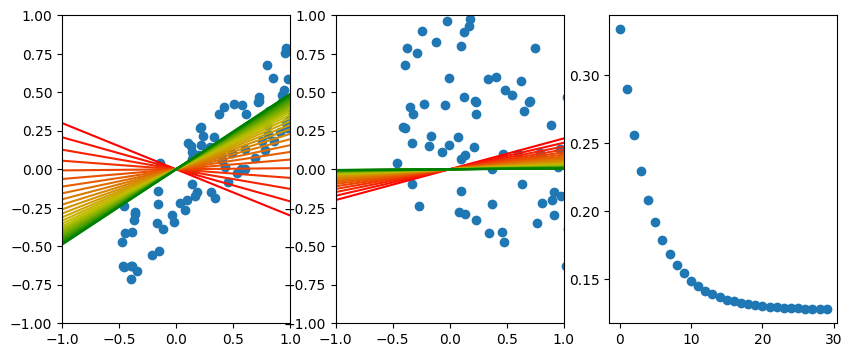

In [ ]:
# lets plot how our parameters and errors changed
colors = list(Color("red").range_to(Color("green"),len(theta)))
f, ax = plt.subplots(1, 3, figsize=(10, 4))
# plot with respect to x1
ax[0].scatter(xs[:,0], ys_true)
[ax[0].axline((0, 0), (1, i[0][0]), c=colors[idx].hex) for idx, i in enumerate(theta)]
# plot with respect to x2
ax[1].scatter(xs[:,1], ys_true)
[ax[1].axline((0, 0), (1, i[0][1]), c=colors[idx].hex) for idx, i in enumerate(theta)]
# plot how error change
ax[2].scatter(range(len(error)), error)
ax[0].set_xlim(-1,1)
ax[0].set_ylim(-1,1)
ax[1].set_xlim(-1,1)
_=ax[1].set_ylim(-1,1)